<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/final_chl_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandas scikit-learn openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [14]:
file_path = "/content/updated synthetic data - Copy.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')


In [15]:
# Assuming the first 8 columns are input variables and the last 3 columns are output variables
X = data.iloc[:, :8]
y = data.iloc[:, -3:]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR(kernel='linear')


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [19]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))


In [20]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


GBR model evaluation:
R2 score (train): 0.949
R2 score (test): 0.339
RMSE (train): 1.850
RMSE (test): 6.901
MAE (train): 1.332
MAE (test): 5.031


RF model evaluation:
R2 score (train): 0.890
R2 score (test): 0.449
RMSE (train): 2.634
RMSE (test): 6.238
MAE (train): 1.924
MAE (test): 4.531


SVR model evaluation:
R2 score (train): 0.252
R2 score (test): 0.161
RMSE (train): 7.021
RMSE (test): 8.262
MAE (train): 4.825
MAE (test): 5.821




In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    return best_model


In [23]:
gbr_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5]
}

rf_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'poly', 'rbf']
}


In [24]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
param_grids = {'GBR': gbr_param_grid, 'RF': rf_param_grid, 'SVR': svr_param_grid}

for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned):
R2 score (train): 0.734
R2 score (test): 0.354
RMSE (train): 4.126
RMSE (test): 6.623
MAE (train): 3.073
MAE (test): 5.125


Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned):
R2 score (train): 0.839
R2 score (test): 0.436
RMSE (train): 3.161
RMSE (test): 6.310
MAE (train): 2.227
MAE (test): 4.629


Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned):
R2 score (train): 0.339
R2 score (test): 0.227
RMSE (train): 6.599
RMSE (test): 7.867
MAE (train): 4.466
MAE (test): 5.627




In [25]:
def evaluate_model_per_output(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred, multioutput='raw_values')
    r2_test = r2_score(y_test, y_test_pred, multioutput='raw_values')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
    mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
    mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test


In [26]:
for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned):
Output 1:
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


Output 2:
R2 score (train): 0.655
R2 score (test): 0.208
RMSE (train): 3.875
RMSE (test): 6.080
MAE (train): 2.733
MAE (test): 4.413


Output 3:
R2 score (train): 0.767
R2 score (test): 0.671
RMSE (train): 5.081
RMSE (test): 6.933
MAE (train): 3.961
MAE (test): 5.824


Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned):
Output 1:
R2 score (train): 0.836
R2 score (test): 0.278
RMSE (train): 2.762
RMSE (test): 6.418
MAE (train): 1.928
MAE (test): 4.818


Output 2:
R2 score (train): 0.809
R2 score (test): 0.361
RMSE (train): 2.884
RMSE (test): 5.463
MAE (train): 1.907
MAE (test): 3.656


Output 3:
R2 score (train): 0.874
R2 score (test): 0.668
RMSE (train): 3.746
RMSE 

In [27]:
# Create initial GBR, RF, and SVR models
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))

models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

# Evaluate the initial models
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


GBR model evaluation:
Output 1:
R2 score (train): 0.956
R2 score (test): 0.174
RMSE (train): 1.429
RMSE (test): 6.864
MAE (train): 1.117
MAE (test): 4.652


Output 2:
R2 score (train): 0.941
R2 score (test): 0.261
RMSE (train): 1.604
RMSE (test): 5.877
MAE (train): 1.156
MAE (test): 3.923


Output 3:
R2 score (train): 0.949
R2 score (test): 0.581
RMSE (train): 2.378
RMSE (test): 7.824
MAE (train): 1.725
MAE (test): 6.517


RF model evaluation:
Output 1:
R2 score (train): 0.890
R2 score (test): 0.245
RMSE (train): 2.262
RMSE (test): 6.563
MAE (train): 1.675
MAE (test): 4.808


Output 2:
R2 score (train): 0.873
R2 score (test): 0.420
RMSE (train): 2.349
RMSE (test): 5.206
MAE (train): 1.627
MAE (test): 3.495


Output 3:
R2 score (train): 0.908
R2 score (test): 0.681
RMSE (train): 3.189
RMSE (test): 6.824
MAE (train): 2.471
MAE (test): 5.289


SVR model evaluation:
Output 1:
R2 score (train): 0.326
R2 score (test): 0.251
RMSE (train): 5.595
RMSE (test): 6.539
MAE (train): 3.808
MAE (test)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
def plot_contour(model, param_grid, X_train, y_train, param1, param2, title):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Obtain results in a DataFrame
    results = pd.DataFrame(grid.cv_results_)
    
    # Extract values for the two selected parameters
    results[param1] = results['params'].apply(lambda x: x[param1])
    results[param2] = results['params'].apply(lambda x: x[param2])

    # Pivot the results DataFrame to create a matrix of mean_test_score
    scores_matrix = results.pivot_table(index=param1, columns=param2, values='mean_test_score')

    # Create a contour plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(-scores_matrix, annot=True, fmt='.4g', cmap='viridis', cbar_kws={'label': 'Mean Squared Error'})
    plt.title(f'{title} Hyperparameter Contour Plot')
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


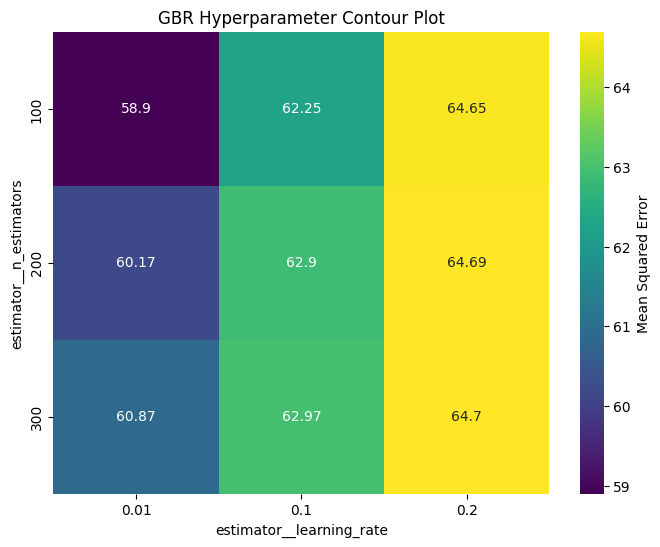

Fitting 5 folds for each of 108 candidates, totalling 540 fits


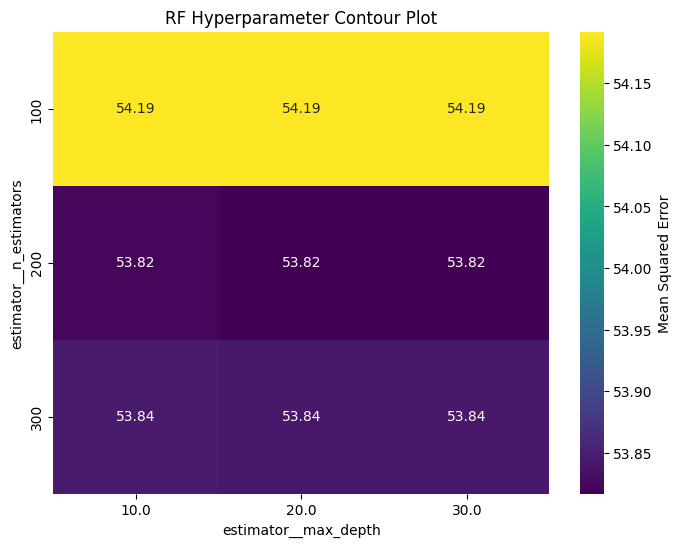

Fitting 5 folds for each of 27 candidates, totalling 135 fits


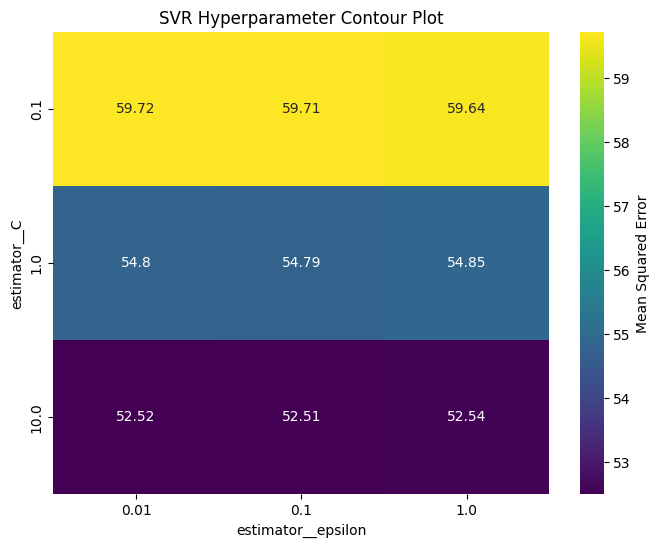

In [30]:
plot_contour(gbr, gbr_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__learning_rate', 'GBR')
plot_contour(rf, rf_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__max_depth', 'RF')
plot_contour(svr, svr_param_grid, X_train, y_train, 'estimator__C', 'estimator__epsilon', 'SVR')


In [31]:
from sklearn.feature_selection import RFECV


In [32]:
def select_features(model, X_train, y_train):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train)
    return selector


In [34]:

def select_features(model, X_train, y_train, target_col):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train[target_col])
    return selector


In [37]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [39]:

param_grids = {
    'GBR': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'RF': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [1, 10, 100],
        'epsilon': [0.01, 0.1, 1]
    }
}


In [40]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [45]:
from sklearn.linear_model import LinearRegression

def select_features(model, X_train, y_train, target_col):
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE (lr)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)

    model.fit(X_train, y_train[target_col])
    return model




In [46]:
from sklearn.feature_selection import RFE


In [47]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")



Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluati

In [48]:
def select_features(model, X_train, y_train, target_col):
    n_features_to_select = 4
    
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE(lr, n_features_to_select=n_features_to_select)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1, min_features_to_select=n_features_to_select)

    model.fit(X_train, y_train[target_col])
    return model


In [49]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluati

In [51]:
import matplotlib.pyplot as plt


In [52]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Line of best fit
    m, b = np.polyfit(y_true, y_pred, 1)
    plt.plot(y_true, m * y_true + b, color='red')

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


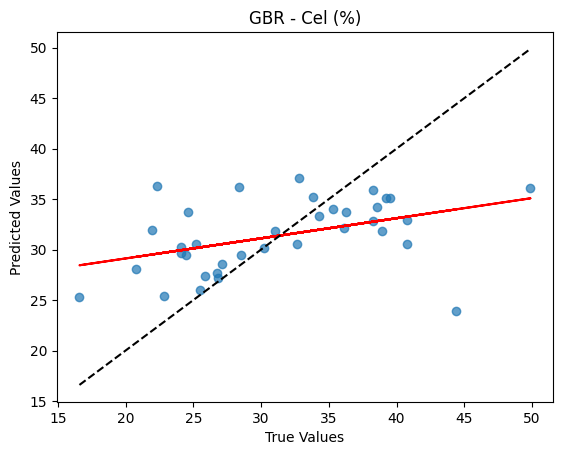



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


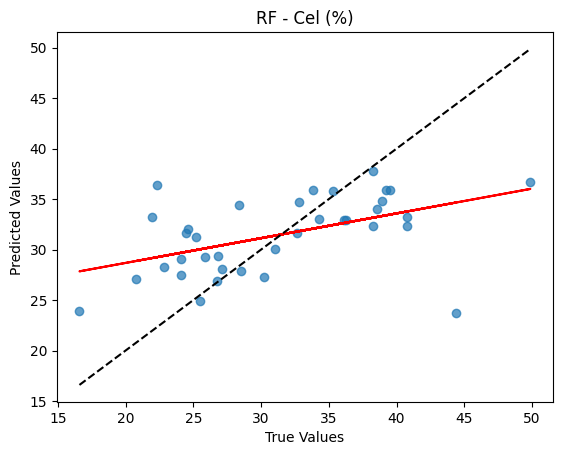



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.259
R2 score (test): 0.117
RMSE (train): 5.868
RMSE (test): 7.100
MAE (train): 4.398
MAE (test): 5.967


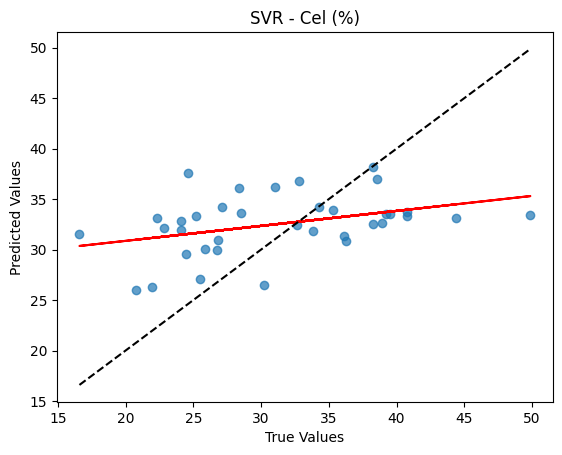



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.660
R2 score (test): 0.236
RMSE (train): 3.847
RMSE (test): 5.975
MAE (train): 2.724
MAE (test): 4.377


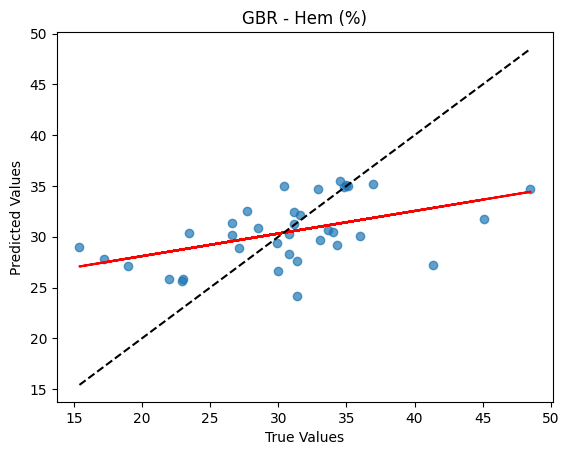



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.886
R2 score (test): 0.416
RMSE (train): 2.223
RMSE (test): 5.222
MAE (train): 1.574
MAE (test): 3.502


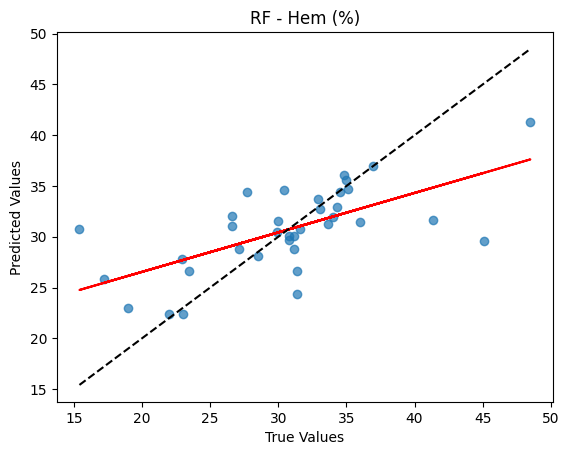



Performing feature selection for SVR...
Selected features: ['H (%)', 'S (%)', 'Ash (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.138
R2 score (test): 0.060
RMSE (train): 6.125
RMSE (test): 6.625
MAE (train): 4.420
MAE (test): 4.740


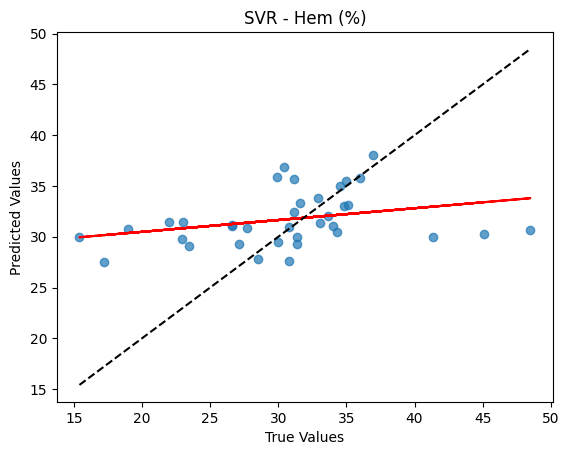



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.616
R2 score (test): 0.529
RMSE (train): 6.526
RMSE (test): 8.287
MAE (train): 5.085
MAE (test): 6.523


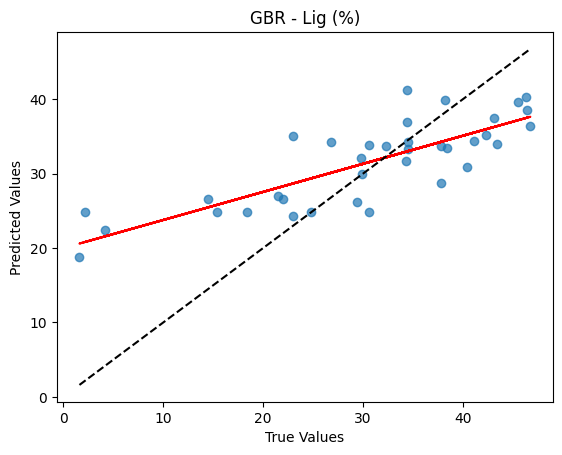



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.747
R2 score (test): 0.656
RMSE (train): 5.296
RMSE (test): 7.089
MAE (train): 4.029
MAE (test): 5.423


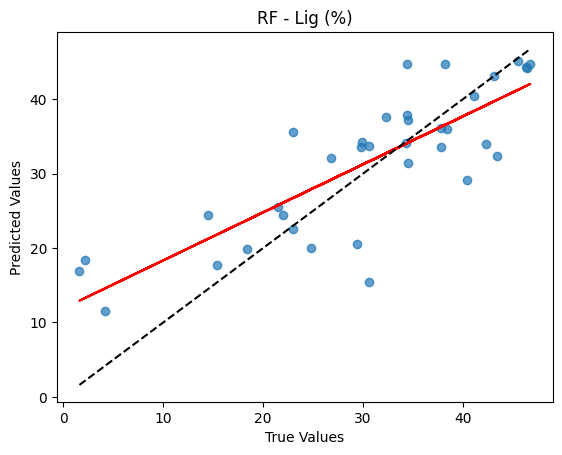



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'VM (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.455
R2 score (test): 0.413
RMSE (train): 7.775
RMSE (test): 9.252
MAE (train): 5.453
MAE (test): 6.558


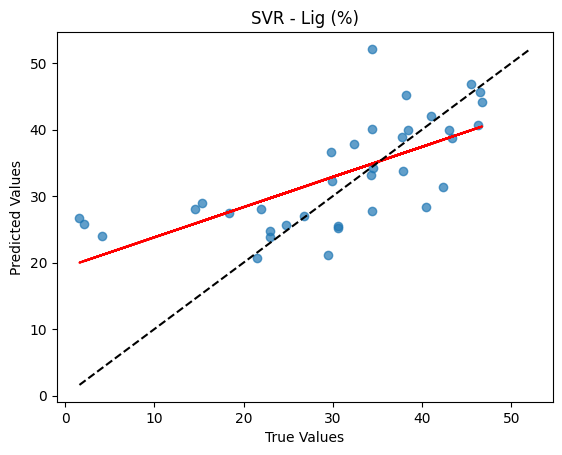

In [55]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [56]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


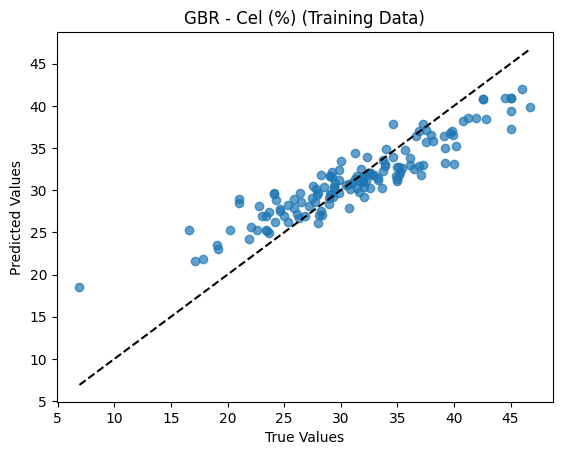



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


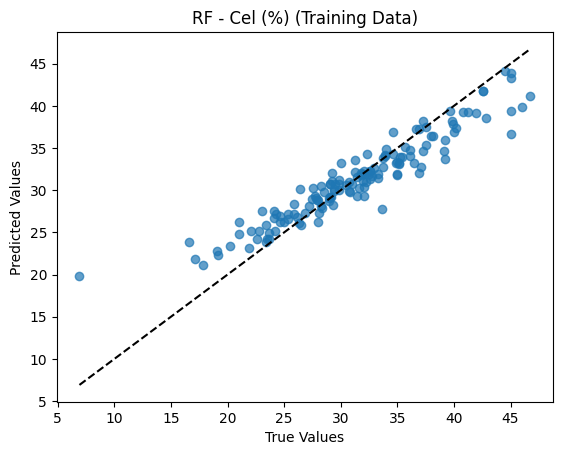



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.259
R2 score (test): 0.117
RMSE (train): 5.868
RMSE (test): 7.100
MAE (train): 4.398
MAE (test): 5.967


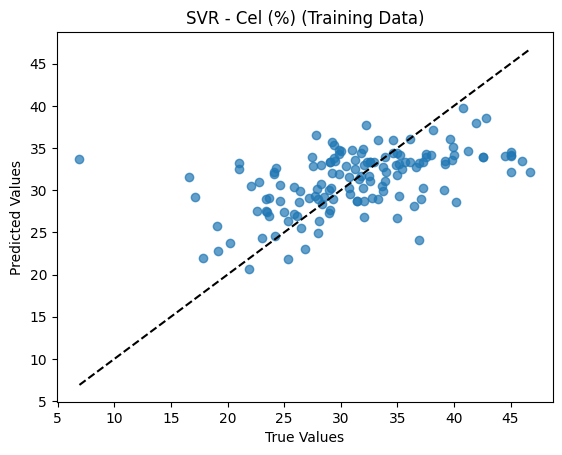



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.660
R2 score (test): 0.236
RMSE (train): 3.847
RMSE (test): 5.975
MAE (train): 2.724
MAE (test): 4.377


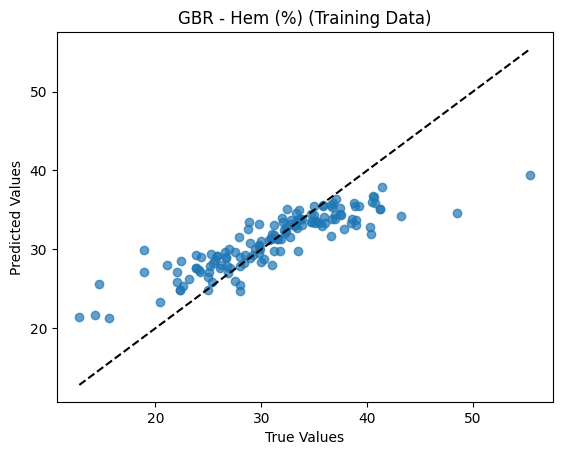



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.886
R2 score (test): 0.416
RMSE (train): 2.223
RMSE (test): 5.222
MAE (train): 1.574
MAE (test): 3.502


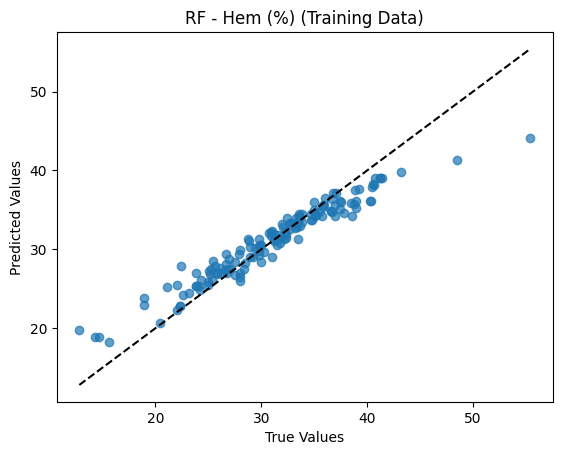



Performing feature selection for SVR...
Selected features: ['H (%)', 'S (%)', 'Ash (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.138
R2 score (test): 0.060
RMSE (train): 6.125
RMSE (test): 6.625
MAE (train): 4.420
MAE (test): 4.740


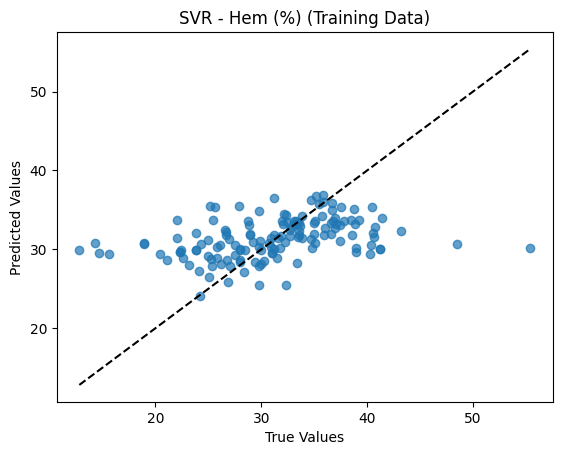



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.616
R2 score (test): 0.529
RMSE (train): 6.526
RMSE (test): 8.287
MAE (train): 5.085
MAE (test): 6.523


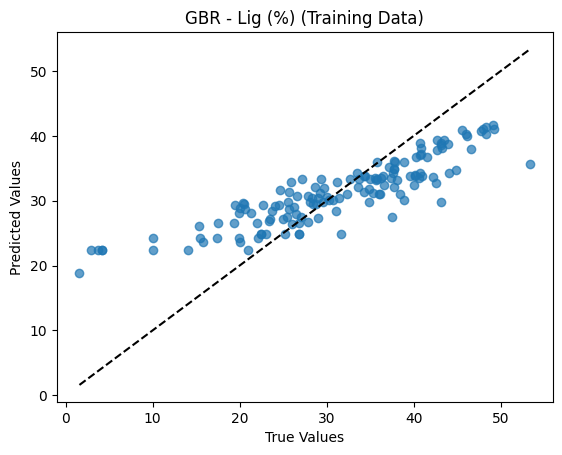



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.747
R2 score (test): 0.656
RMSE (train): 5.296
RMSE (test): 7.089
MAE (train): 4.029
MAE (test): 5.423


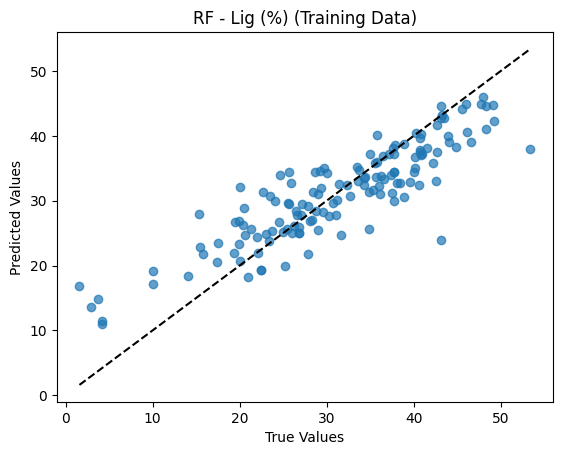



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'VM (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.455
R2 score (test): 0.413
RMSE (train): 7.775
RMSE (test): 9.252
MAE (train): 5.453
MAE (test): 6.558


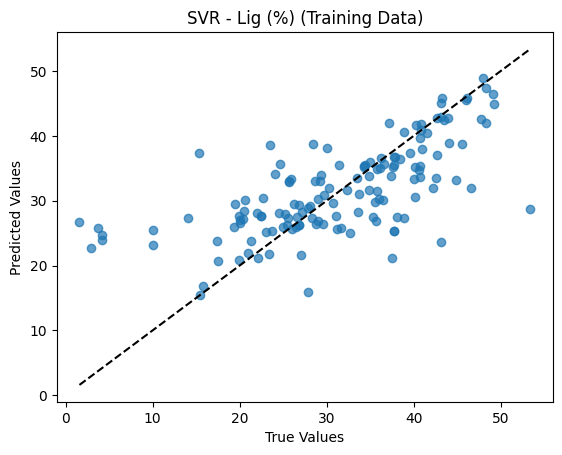

In [57]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [58]:
import seaborn as sns


In [59]:
def plot_parity(y_true, y_pred, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map
    cmap = sns.cubehelix_palette(as_cmap=True)
    points = plt.scatter(y_true, y_pred, c=y_pred, cmap=cmap, alpha=0.7)
    plt.colorbar(points, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


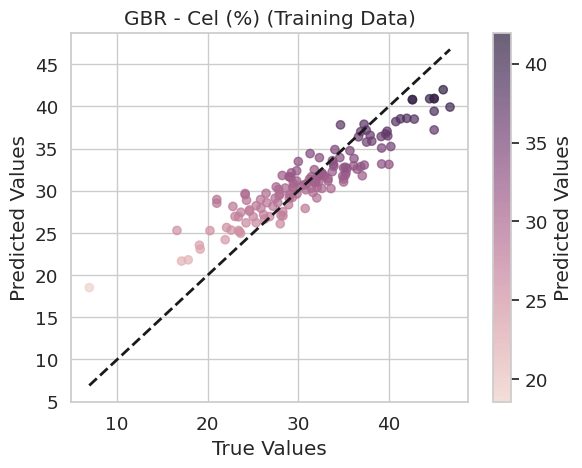



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


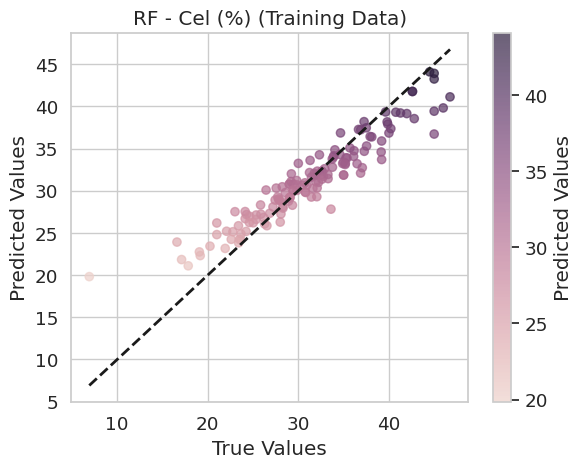



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.259
R2 score (test): 0.117
RMSE (train): 5.868
RMSE (test): 7.100
MAE (train): 4.398
MAE (test): 5.967


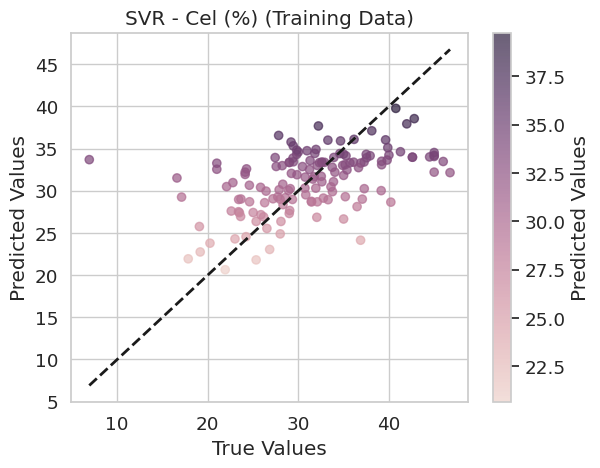



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.660
R2 score (test): 0.236
RMSE (train): 3.847
RMSE (test): 5.975
MAE (train): 2.724
MAE (test): 4.377


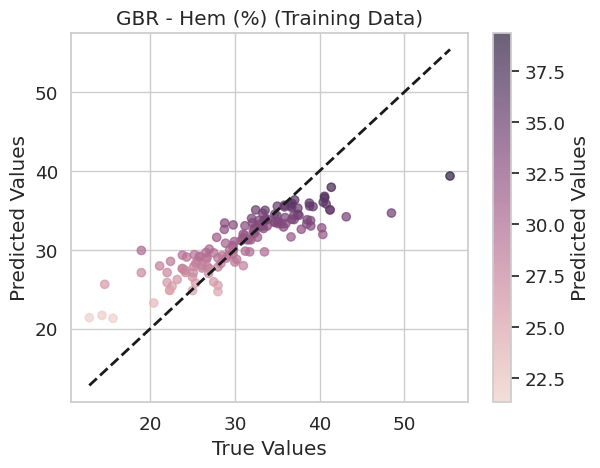



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.886
R2 score (test): 0.416
RMSE (train): 2.223
RMSE (test): 5.222
MAE (train): 1.574
MAE (test): 3.502


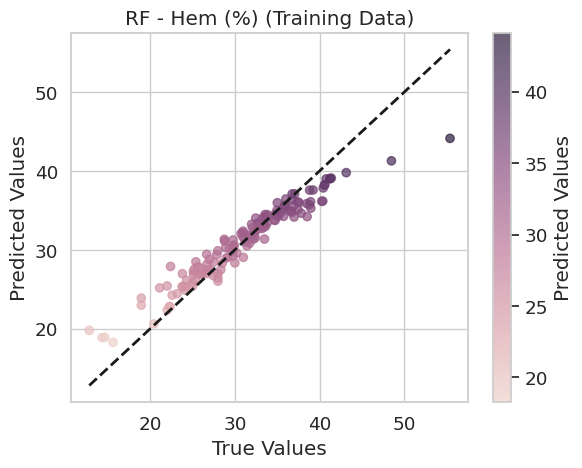



Performing feature selection for SVR...
Selected features: ['H (%)', 'S (%)', 'Ash (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.138
R2 score (test): 0.060
RMSE (train): 6.125
RMSE (test): 6.625
MAE (train): 4.420
MAE (test): 4.740


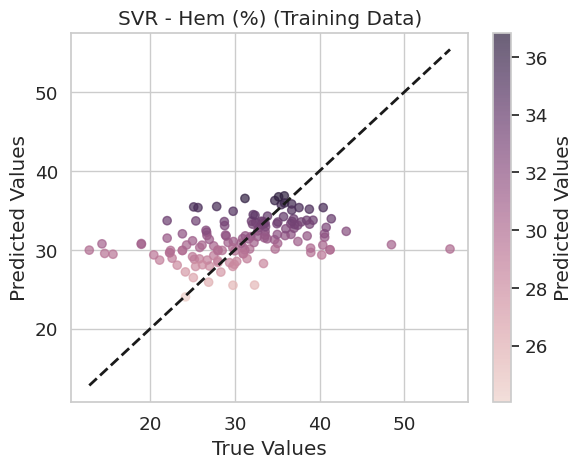



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.616
R2 score (test): 0.529
RMSE (train): 6.526
RMSE (test): 8.287
MAE (train): 5.085
MAE (test): 6.523


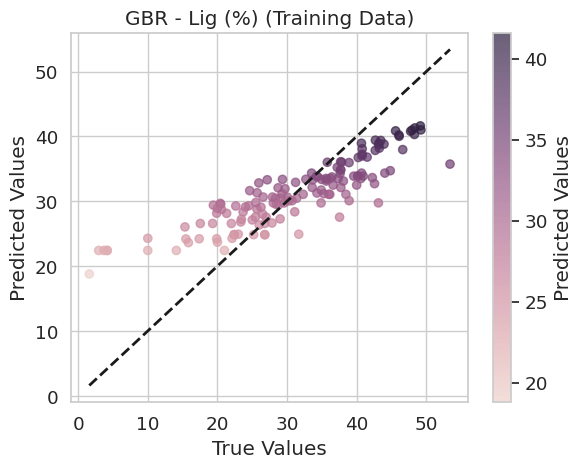



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.747
R2 score (test): 0.656
RMSE (train): 5.296
RMSE (test): 7.089
MAE (train): 4.029
MAE (test): 5.423


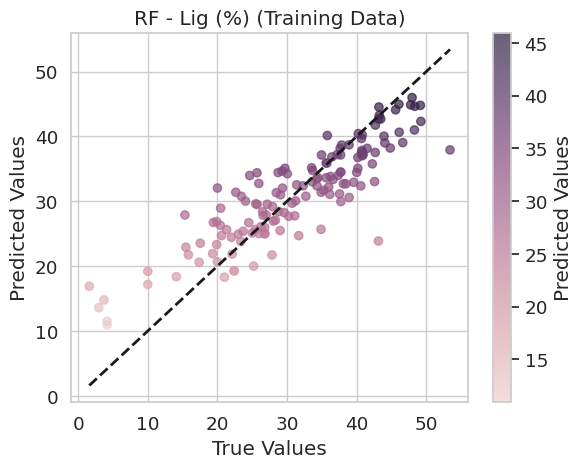



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'VM (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.455
R2 score (test): 0.413
RMSE (train): 7.775
RMSE (test): 9.252
MAE (train): 5.453
MAE (test): 6.558


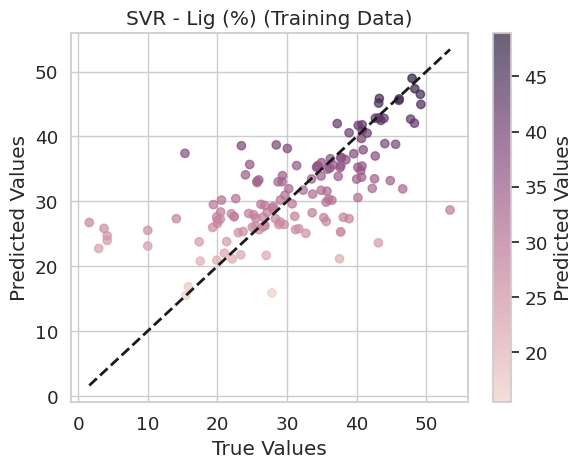

In [60]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [61]:
def plot_parity(y_true_train, y_pred_train, y_true_test, y_pred_test, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map for training data
    cmap_train = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)
    points_train = plt.scatter(y_true_train, y_pred_train, c=y_pred_train, cmap=cmap_train, alpha=0.7, marker='o', label='Training Data')

    # Scatter plot with a color map for test data
    cmap_test = sns.cubehelix_palette(start=2.5, rot=-0.5, as_cmap=True)
    points_test = plt.scatter(y_true_test, y_pred_test, c=y_pred_test, cmap=cmap_test, alpha=0.7, marker='s', label='Test Data')

    plt.colorbar(points_train, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true_train), min(y_true_test), min(y_pred_train), min(y_pred_test))
    max_val = max(max(y_true_train), max(y_true_test), max(y_pred_train), max(y_pred_test))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.legend()
    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.779
R2 score (test): 0.184
RMSE (train): 3.200
RMSE (test): 6.825
MAE (train): 2.525
MAE (test): 5.138


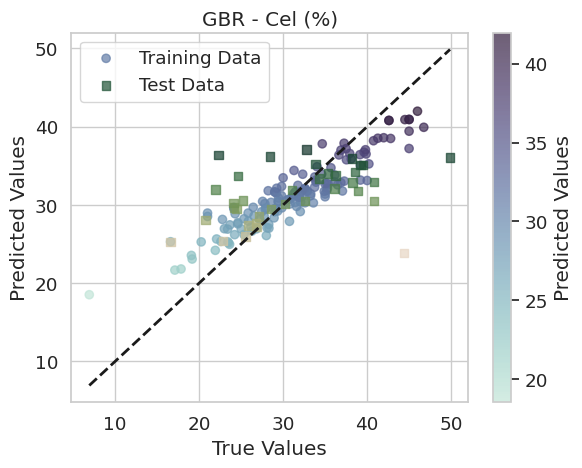



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.850
R2 score (test): 0.244
RMSE (train): 2.641
RMSE (test): 6.568
MAE (train): 1.906
MAE (test): 4.913


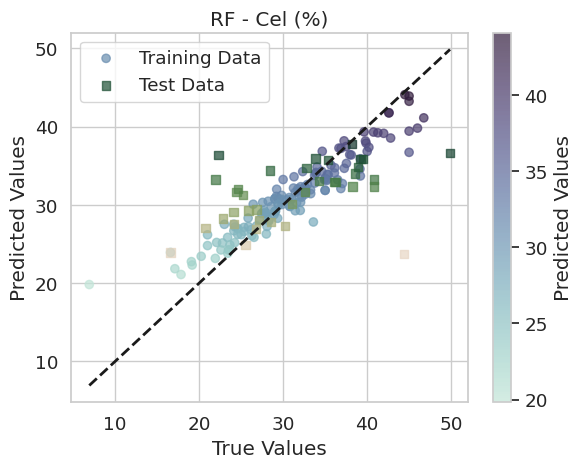



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.259
R2 score (test): 0.117
RMSE (train): 5.868
RMSE (test): 7.100
MAE (train): 4.398
MAE (test): 5.967


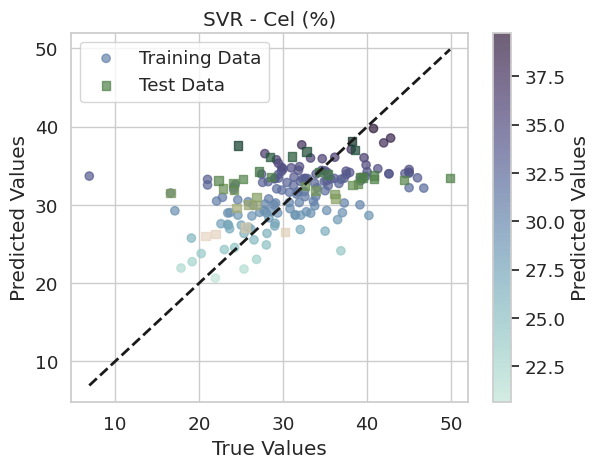



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.660
R2 score (test): 0.236
RMSE (train): 3.847
RMSE (test): 5.975
MAE (train): 2.724
MAE (test): 4.377


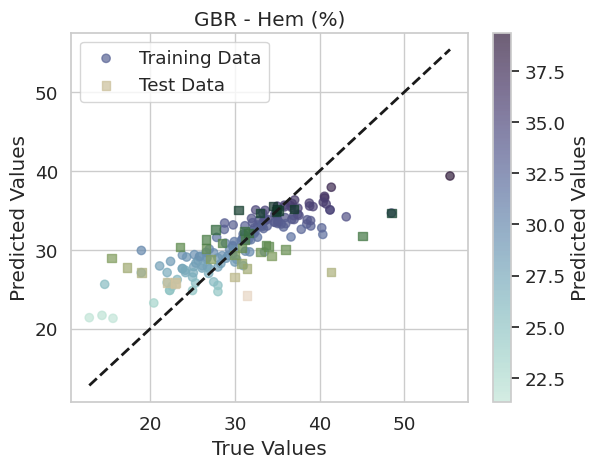



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.886
R2 score (test): 0.416
RMSE (train): 2.223
RMSE (test): 5.222
MAE (train): 1.574
MAE (test): 3.502


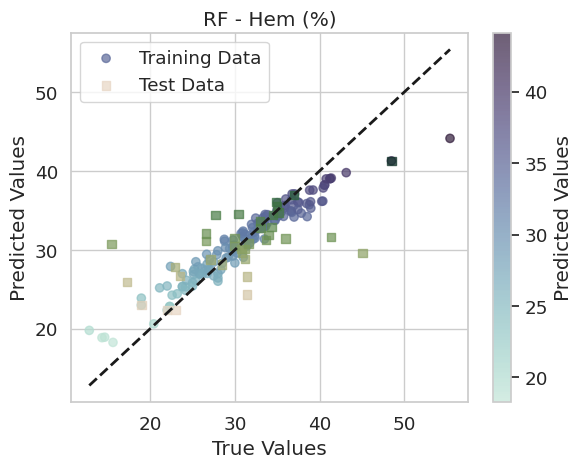



Performing feature selection for SVR...
Selected features: ['H (%)', 'S (%)', 'Ash (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.138
R2 score (test): 0.060
RMSE (train): 6.125
RMSE (test): 6.625
MAE (train): 4.420
MAE (test): 4.740


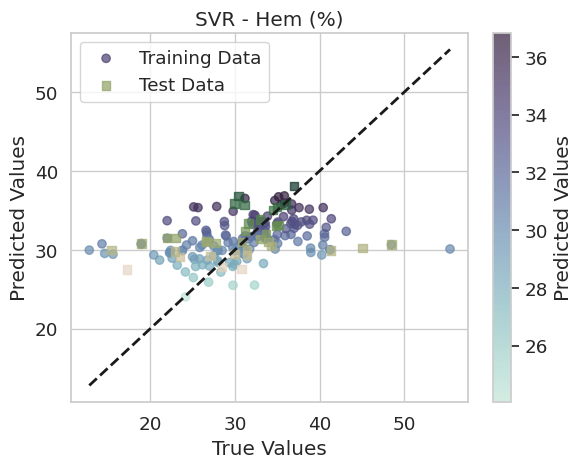



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.616
R2 score (test): 0.529
RMSE (train): 6.526
RMSE (test): 8.287
MAE (train): 5.085
MAE (test): 6.523


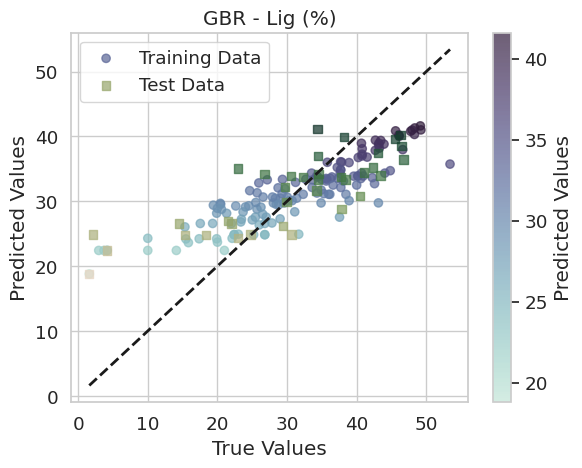



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.747
R2 score (test): 0.656
RMSE (train): 5.296
RMSE (test): 7.089
MAE (train): 4.029
MAE (test): 5.423


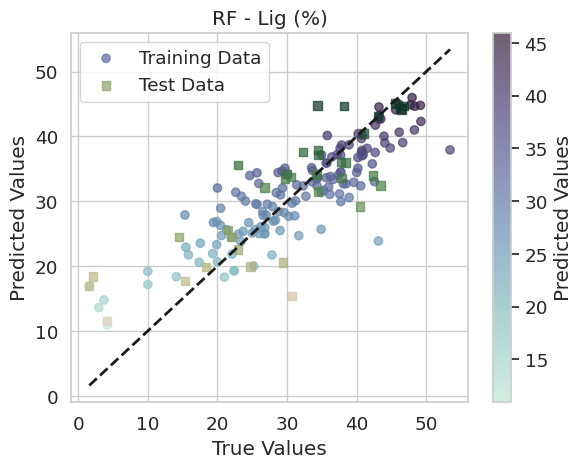



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'VM (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.455
R2 score (test): 0.413
RMSE (train): 7.775
RMSE (test): 9.252
MAE (train): 5.453
MAE (test): 6.558


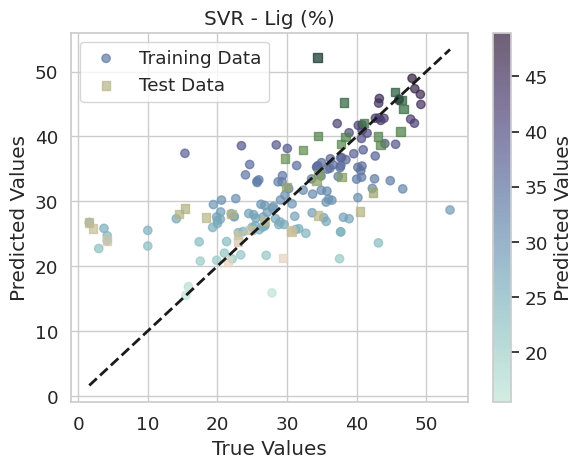

In [62]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_train[output_col], y_pred_train, y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [63]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 17.2 MB/s eta 0:00:00


Output Cel (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


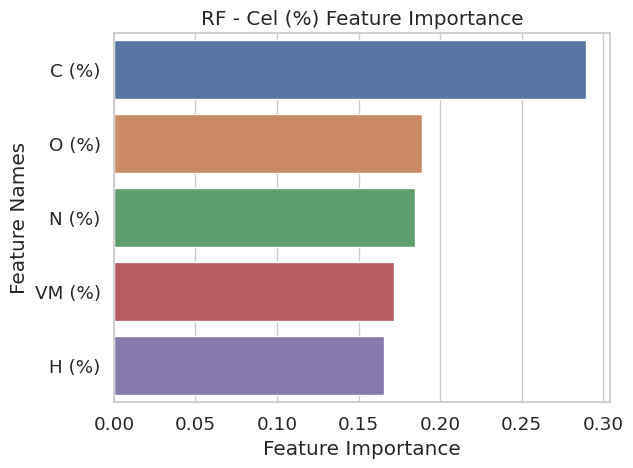

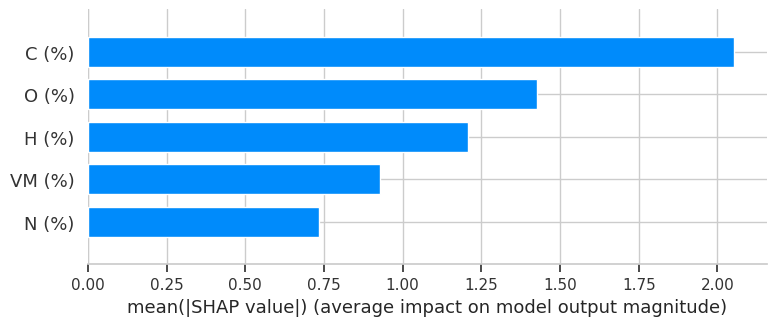



Output Hem (%):
Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


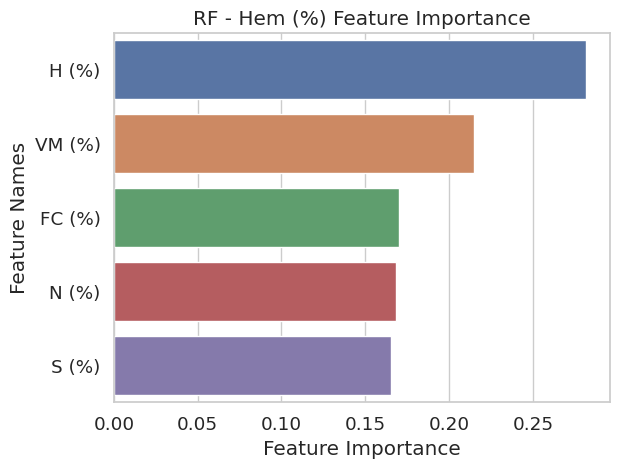

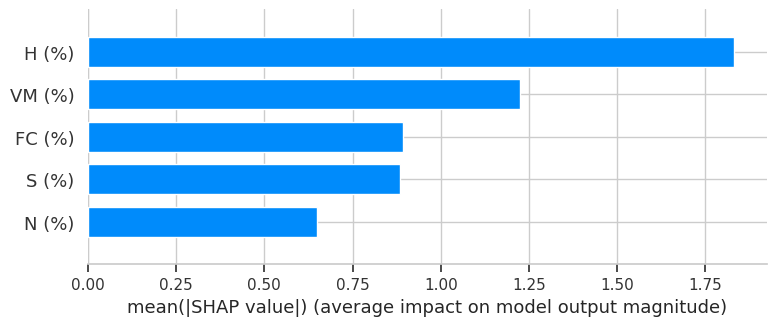



Output Lig (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


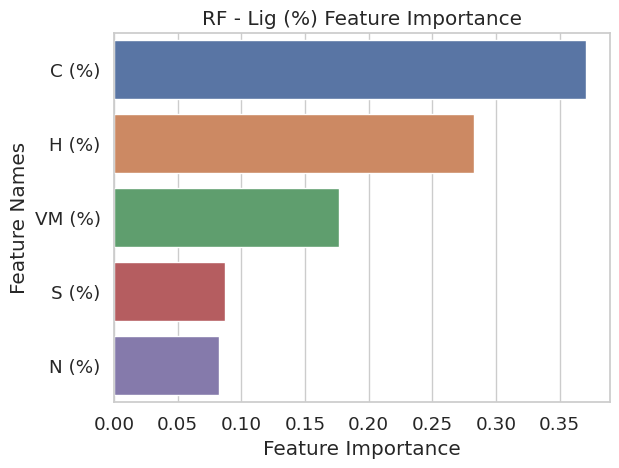

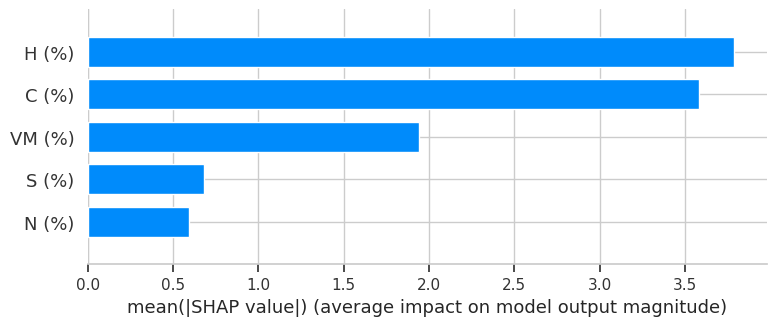

In [64]:
def plot_feature_importance(importance, names, title):
    sns.set(style='whitegrid', font_scale=1.2)
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.show()

selected_model_name = 'RF'
selected_model = models[selected_model_name]

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    
    print(f"Performing feature selection for {selected_model_name}...")
    selector = select_features(selected_model, X_train, y_train, output_col)
    X_train_selected = X_train.iloc[:, selector.support_]
    X_test_selected = X_test.iloc[:, selector.support_]
    print(f"Selected features: {X_train_selected.columns.tolist()}")

    print(f"Tuning {selected_model_name} hyperparameters...")
    tuned_model = tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train[output_col])

    # Feature importance plot
    feature_importances = tuned_model.feature_importances_
    plot_feature_importance(feature_importances, X_train_selected.columns, title=f"{selected_model_name} - {output_col} Feature Importance")

    # SHAP analysis plot
    explainer = shap.TreeExplainer(tuned_model)
    shap_values = explainer.shap_values(X_train_selected)

    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis")
    print("\n")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


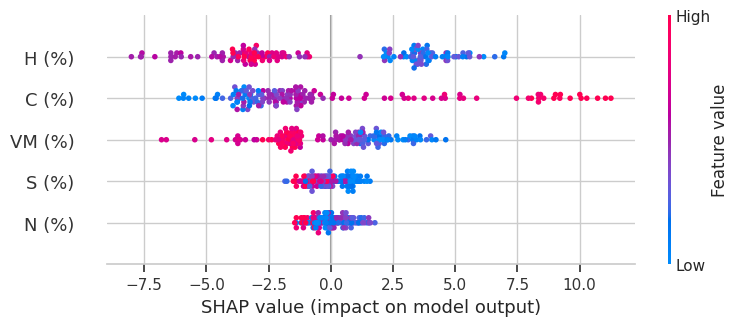

In [65]:
# SHAP analysis plot
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_train_selected)

shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


In [67]:
def select_features_multi_output(model, X, y, num_features=4):
    # Train an RFE model
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe = rfe.fit(X, y)
    
    return rfe




Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


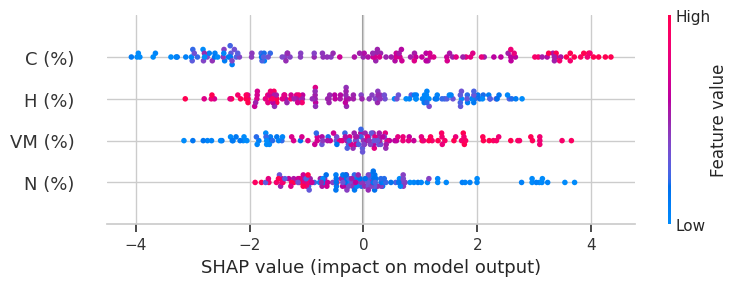

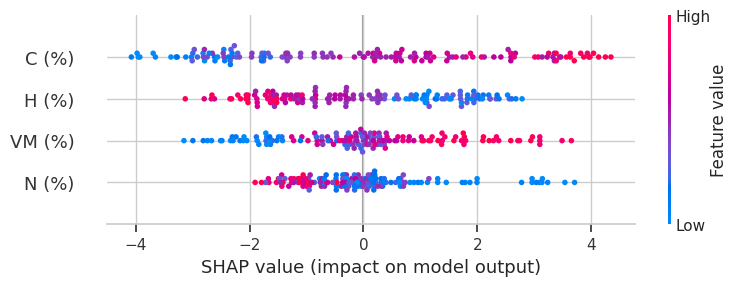

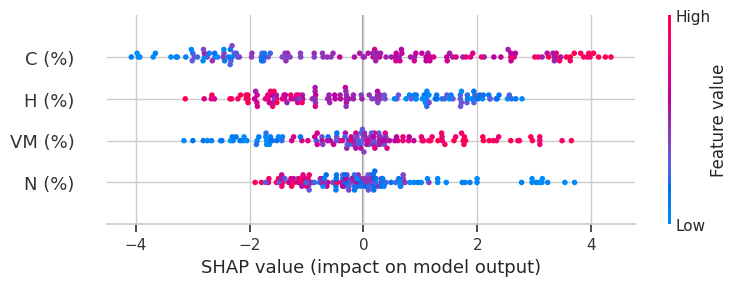

In [68]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Perform feature selection for the selected model
print(f"Performing feature selection for {selected_model_name}...")
selector = select_features_multi_output(selected_model, X_train, y_train)
X_train_selected = X_train.iloc[:, selector.support_]
X_test_selected = X_test.iloc[:, selector.support_]
print(f"Selected features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


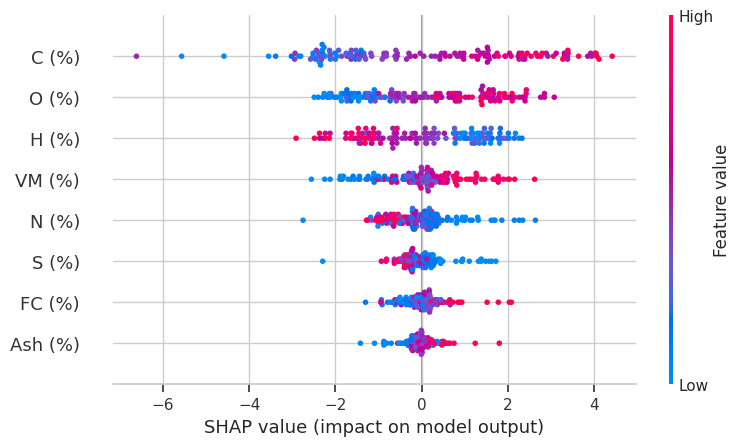

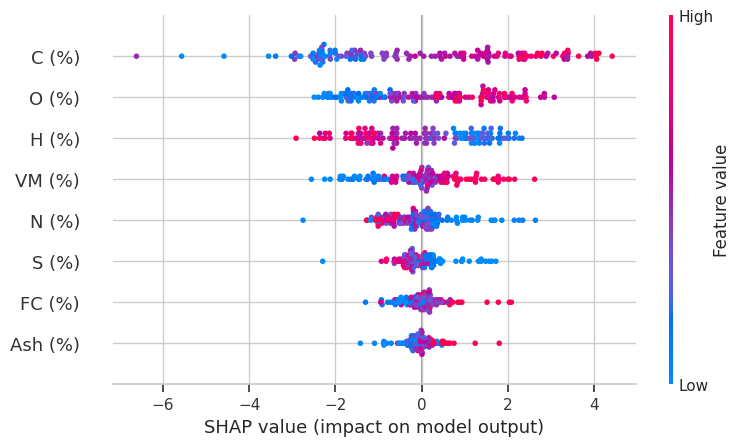

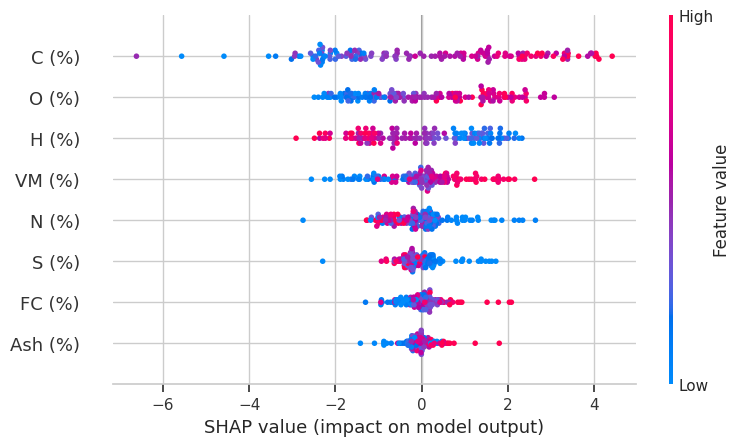

In [69]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


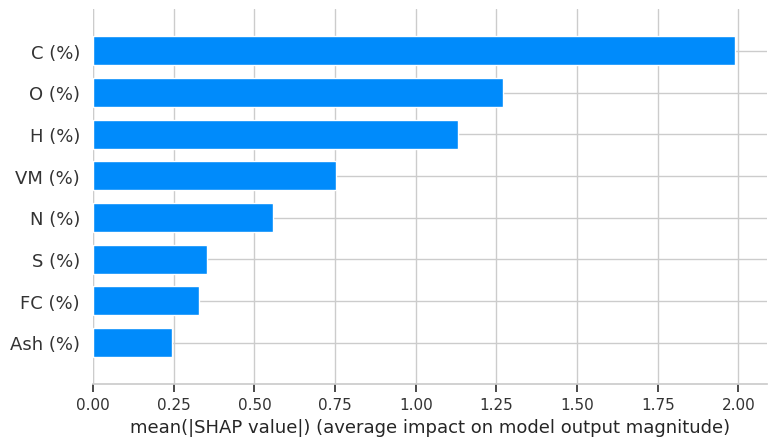

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


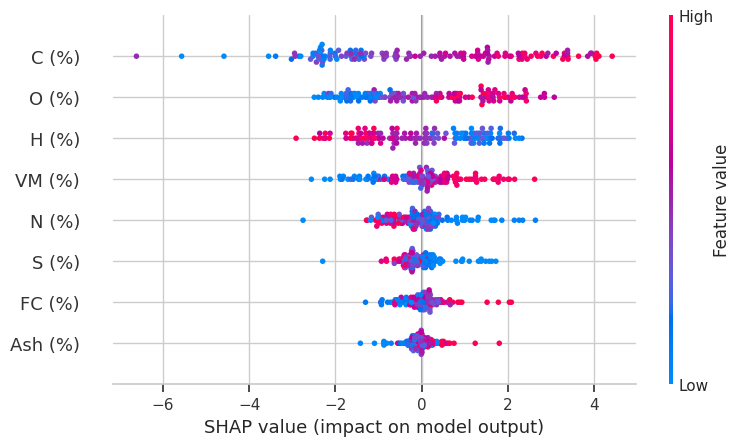

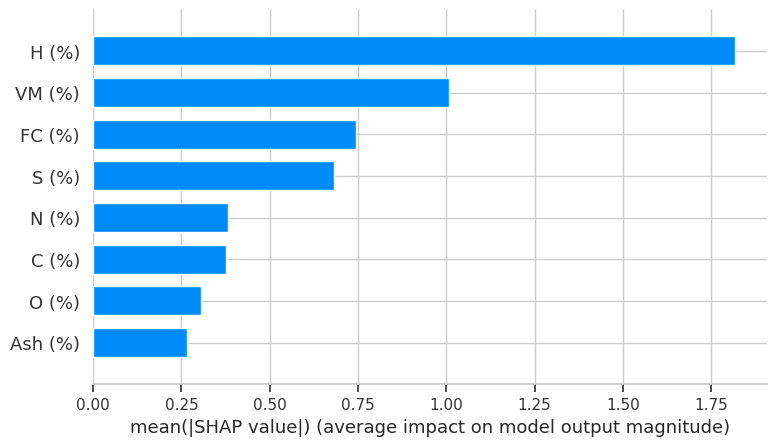

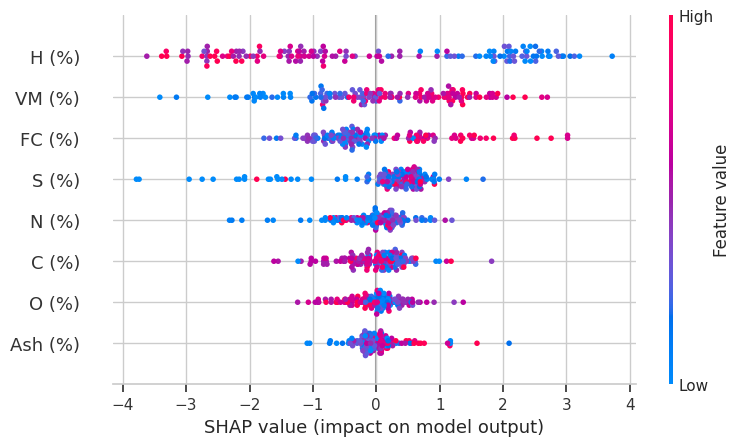

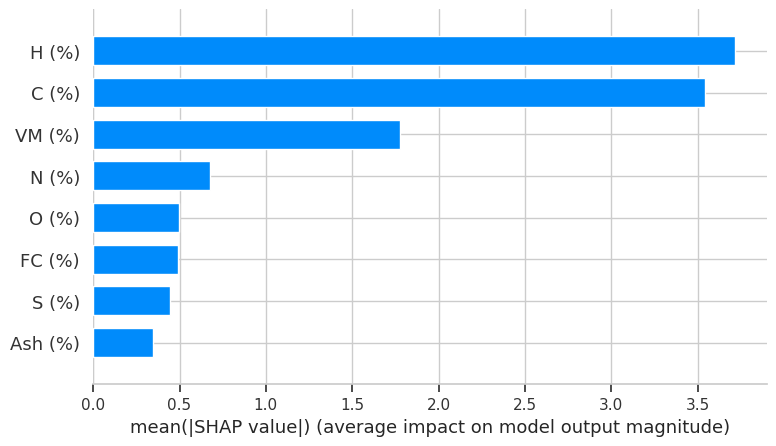

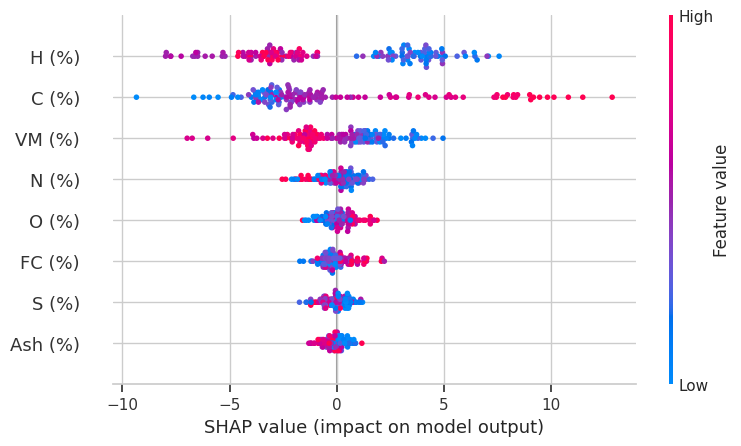

In [70]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP bar and tornado plots for each output variable
for idx, output_col in enumerate(y_train.columns):
    explainer = shap.TreeExplainer(multi_output_model.estimators_[idx])
    shap_values = explainer.shap_values(X_train_selected)
    
    # SHAP bar plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis (Bar)")
    
    # SHAP tornado plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis (Tornado)")


In [71]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict using the multi_output_model and display the results
def predict(inputs):
    input_data = pd.DataFrame([inputs], columns=X_train.columns)
    predictions = multi_output_model.predict(input_data)
    for i, output_col in enumerate(y_train.columns):
        print(f"{output_col}: {predictions[0][i]:.2f}")

# Create input widgets for each feature
input_widgets = {}
for col in X_train.columns:
    input_widgets[col] = widgets.FloatText(value=0, description=col)

# Create a button for prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_button_click(b):
    inputs = {key: widget.value for key, widget in input_widgets.items()}
    predict(inputs)

predict_button.on_click(on_button_click)

# Display the widgets
for widget in input_widgets.values():
    display(widget)
display(predict_button)


FloatText(value=0.0, description='C (%)')

FloatText(value=0.0, description='H (%)')

FloatText(value=0.0, description='N (%)')

FloatText(value=0.0, description='O (%)')

FloatText(value=0.0, description='S (%)')

FloatText(value=0.0, description='VM (%)')

FloatText(value=0.0, description='Ash (%)')

FloatText(value=0.0, description='FC (%)')

Button(description='Predict', style=ButtonStyle())

Cel (%): 24.56
Hem (%): 28.94
Lig (%): 25.71
